* [Analyse univariée](#au)
* [Analyse bivariée](#ab)
* [Analyse multivariée (PCA,ANOVA)](#am)

In [120]:
#!pip install researchpy

In [121]:
 #!pip install pingouin


In [1]:
import pandas as pd #(Vaex – Faster Pandas Alternate in Python)
import numpy as np
from hurry.filesize import size
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pingouin as pg
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA

import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data_exploration.csv',sep='\t')

<AxesSubplot:>

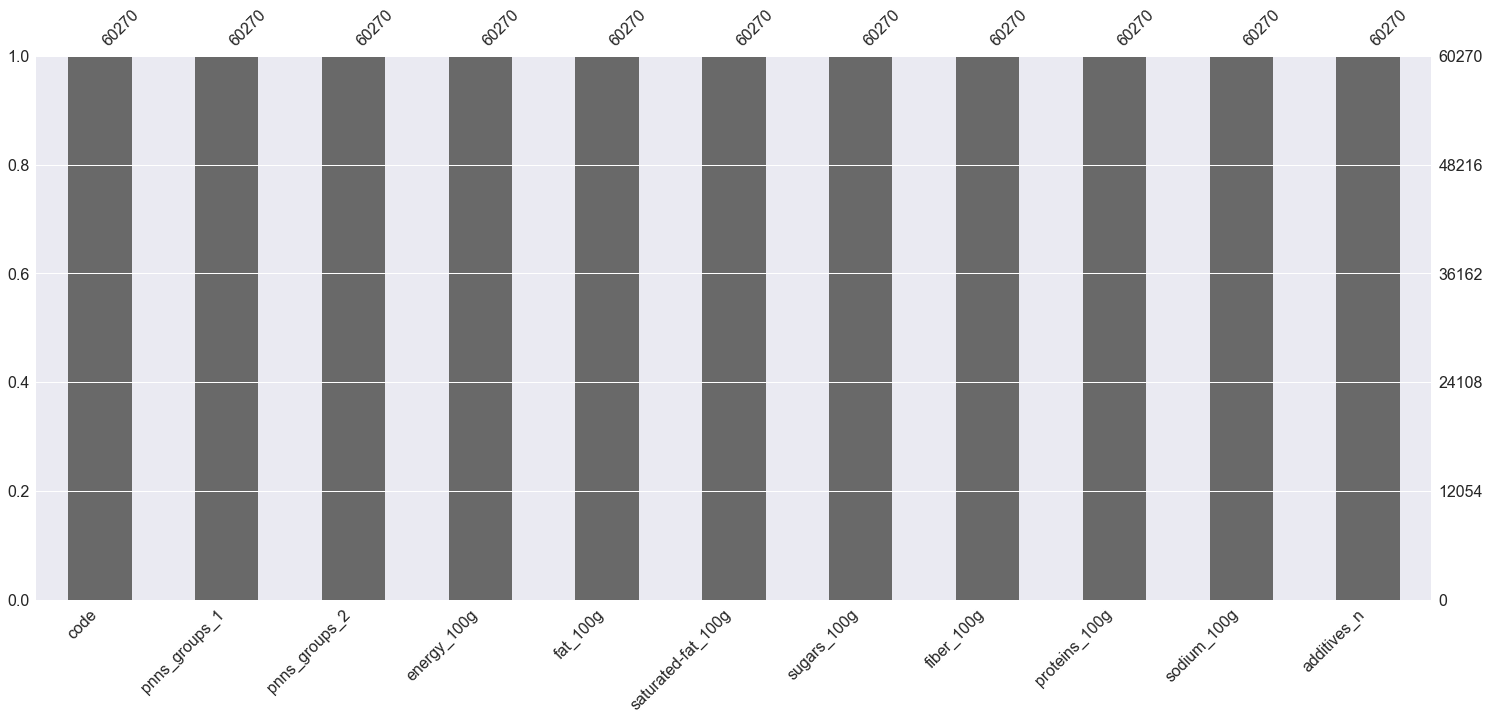

In [4]:
msno.bar(df)

# Analyse univariée <a class="anchor" id="au"></a>
## Données catégorielles

In [5]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,additives_n
count,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000
mean,1028.070213,12.468236,4.718871,10.699272,1.864137,7.429972,0.286530,1.246657
std,606.468864,12.376869,4.802869,11.587205,1.007920,5.247110,0.216727,2.260489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,629.000000,3.700000,1.200000,2.600000,1.864137,4.700000,0.149606,0.000000
50%,1012.196908,12.225747,4.636180,10.699272,1.864137,7.334751,0.283744,0.000000
75%,1149.000000,12.225747,4.636180,10.699272,1.864137,7.334751,0.311024,2.000000
max,4571.817739,100.000000,31.000000,86.000000,7.900000,37.000000,1.732283,31.000000


In [127]:
# add a column contains_additives.It takes 0 if additives_n=1 else it takes 1

In [6]:
df["contains_additives"]=pd.Series(np.where(df.additives_n>0,1,0)).astype(int)

In [7]:
#Let's take a look at what part of the products actually contain additives. I'm going to apply grouping on the contains_additives column and change the index names for clarity.
#There should be only two classes here.
products_with_additives=df["contains_additives"].groupby(df["contains_additives"]).count()
products_with_additives

contains_additives
0    37082
1    23188
Name: contains_additives, dtype: int64

In [10]:

products_with_additives.index=["don't contain additives","contain additives"]
#assert_equal(len(products_with_additives),2)

In [11]:
def plot_pie_on_grouped_data(grouped_data,title,explode):
    plt.gca().set_aspect("equal")
    plt.pie(grouped_data,labels=grouped_data.index, autopct = "%.2f%%",explode=explode,radius=1)
    plt.title(title)
    plt.show()

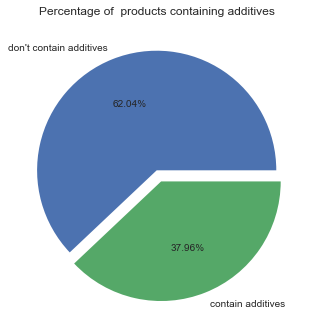

In [132]:
plot_pie_on_grouped_data(products_with_additives,"Percentage of  products containing additives",(0,0.1))

In [133]:
def plot_countplot_categoriel_feature(dataframe,column,figH,figW):
    """
    This function plots the countplot fgure of the specified column of the dataframe.    
    

    Parameters
    ----------
   
    dataframe : Dataframe
        Dataframe containing the feature column.
    column : string
        Specific feature.
    figH  : int
        Hight of the resulted figure.
    figW: int
        Width of the resulted figure.
 
    
    Examples
    --------
    >>> plot_countplot_categoriel_feature(df,'pnns_groups_1',20,10)
  
    """
    myFig=plt.figure(figsize=(figH,figW))
    title='Distribution de '+column
    plt.title(title)
    
    sns.countplot(dataframe[column])#.set(title='Distribution de ',column)
    
    xl='Valeurs de '+column
    plt.xlabel(xl)
    yl="Nombre de valeurs"
    plt.ylabel(yl)
    
    
   
    

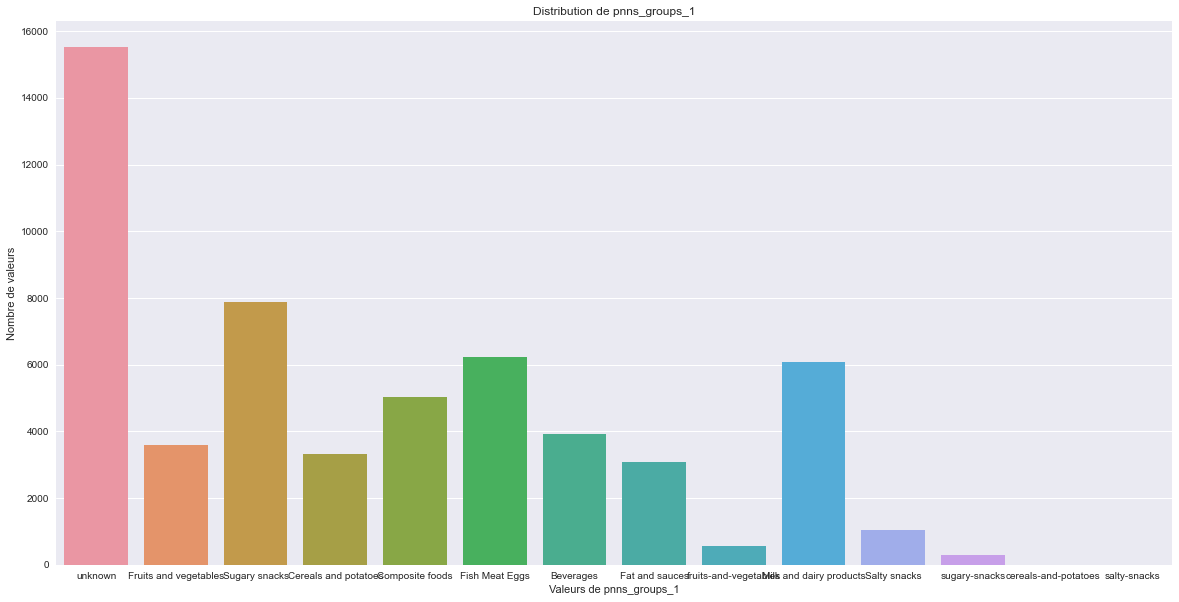

In [134]:
plot_countplot_categoriel_feature(df,'pnns_groups_1',20,10)

## Données numériques

In [135]:
def plot_histogram_numerical_feature(dataframe,column,nb_bins):
    """
    This function plots the histogram  of the specified column of the dataframe.    
    

    Parameters
    ----------
   
    dataframe : Dataframe
        Dataframe containing the feature column.
    column : string
        Specific feature.
    nb_bins  : int
        Number of bins.

    Examples
    --------
    >>> plot_histogram_numerical_feature(df,'energy_100g',100)
  
    """
    #plt.title("Distribution of", column,"in products" )
    #plt.xlabel(column," count")
    #plt.ylabel(column," count distribution")
    title='Distribution of '+column
    plt.title(title)
    if pd.isna(nb_bins):
        plt.hist(dataframe[column])
    else:
        plt.hist(dataframe[column],bins=nb_bins)
    plt.show()

In [136]:
#
numeric_features=['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g',  'additives_n']
#plot_histogram_numerical_feature(df,'energy_100g',100)
#for nf in numeric_features:
#    plot_histogram_numerical_feature(df,nf,100)

In [137]:
def plot_second_histogram_numerical_feature(dataframe,column,nb_bins):
    """
    This function plots the histogram  of the specified column of the dataframe.    
    

    Parameters
    ----------
   
    dataframe : Dataframe
        Dataframe containing the feature column.
    column : string
        Specific feature.
    nb_bins  : int
        Number of bins.

    
    Examples
    --------
    >>>  plot_second_histogram_numerical_feature(df,'pnns_groups_1','%.2f',15,10)
  
    """
    sns.distplot(dataframe[column],bins=nb_bins)
    plt.show()

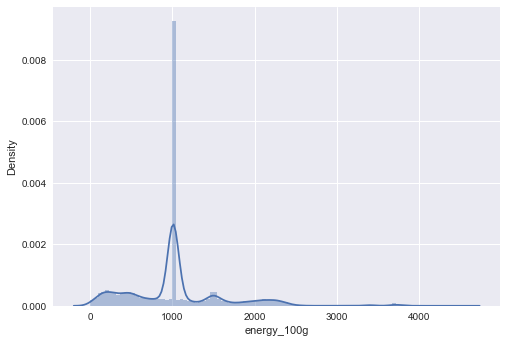

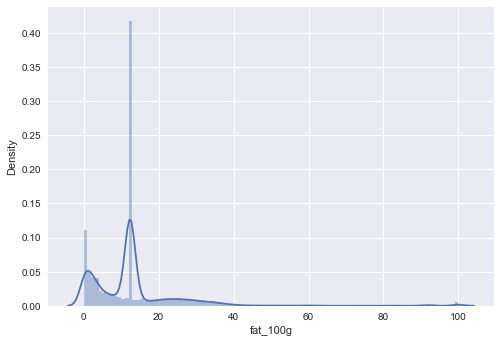

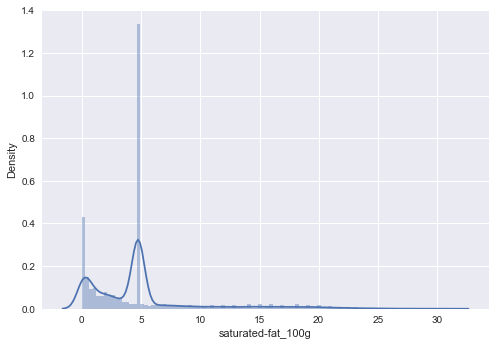

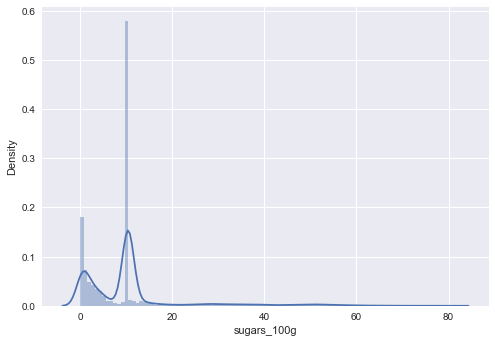

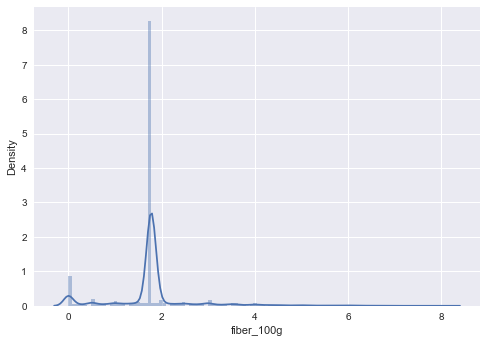

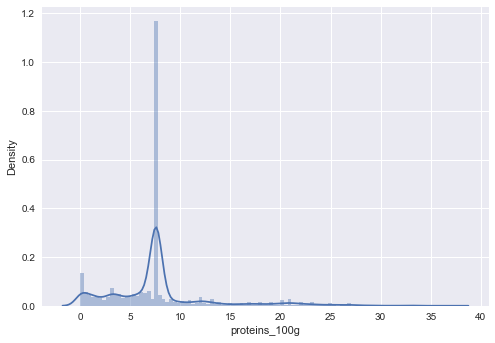

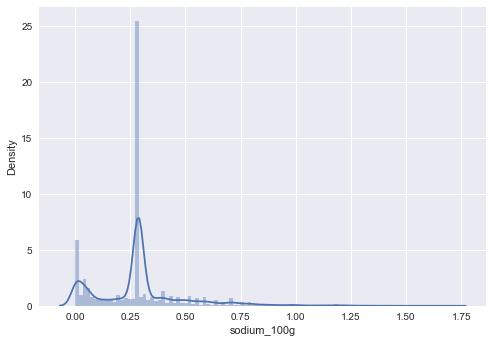

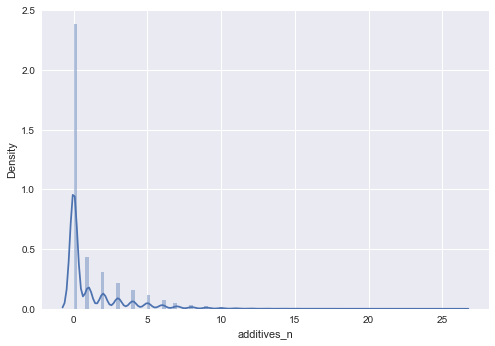

In [138]:
numeric_features=['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'additives_n']
#plot_histogram_numerical_feature(df,'energy_100g',100)
for nf in numeric_features:
    plot_second_histogram_numerical_feature(df,nf,100)

# Analyse bivariée <a class="anchor" id="ab"></a>

## Numérique et numérique

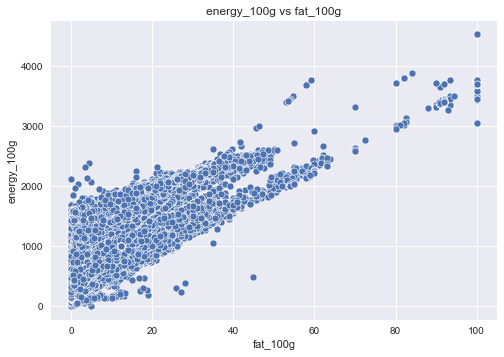

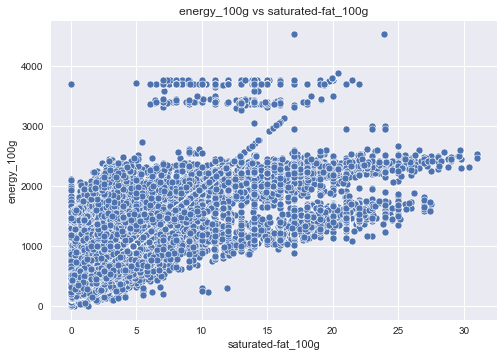

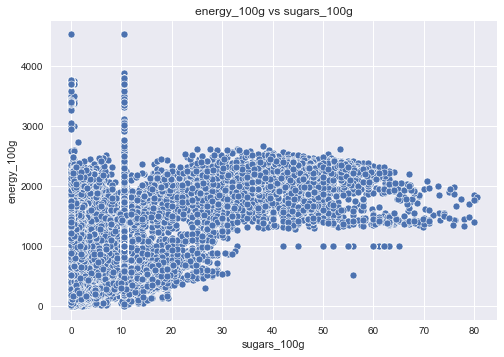

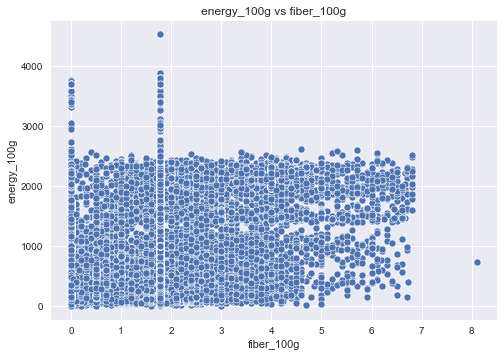

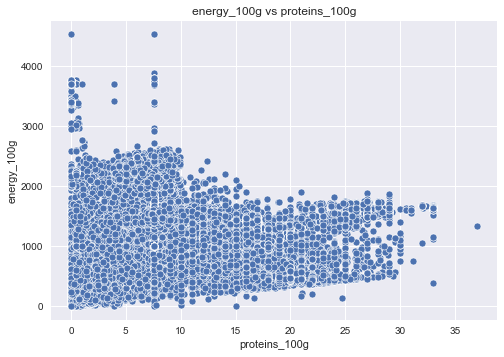

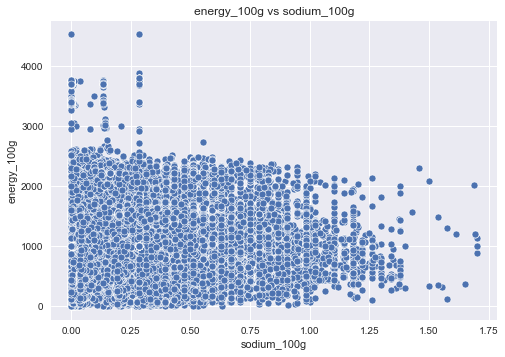

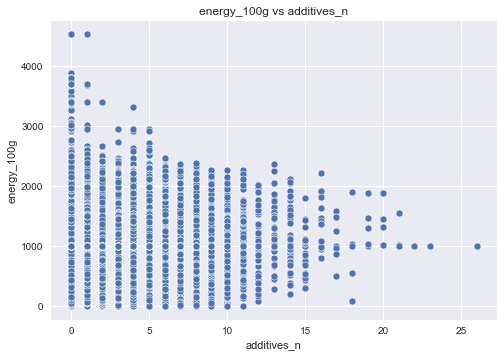

In [139]:
#Nuage de points
#['energy_100g', 'fat_100g','saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g', 'fruits-vegetables-nuts_100g', 'additives_n']
#pd.crosstab(df['energy_100g'], df['sugars_100g'])
ing_to_test_with_energy=['fat_100g','saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g', 'additives_n']
for ing in ing_to_test_with_energy:
    title='energy_100g vs '+ing
    plt.title(title)
    sns.scatterplot( df[ing],df['energy_100g'])#bivarié
#sns.scatterplot(df['fat_100g'], df['saturated-fat_100g'],hue=df['energy_100g'])#multivarié
    plt.show()

## Numérique et catégoriel

In [141]:
additives_by_pnss_group1=df["additives_n"].groupby(df["pnns_groups_1"])
additives_by_pnss_group1

In [142]:
num_products_by_pnss_group1=df.pnns_groups_1.groupby(df.pnns_groups_1).count().sort_values(ascending=False).nlargest(10)

In [143]:
def plot_barh_on_grouped_data(grouped_data,title,y_label,fig_size):
    plt.figure(figsize = fig_size)
    plt.title(title)
    plt.ylabel(y_label)
    plt.barh(range(len(grouped_data)), grouped_data)
    plt.yticks(list(range(len(grouped_data))), grouped_data.index)
    plt.show()

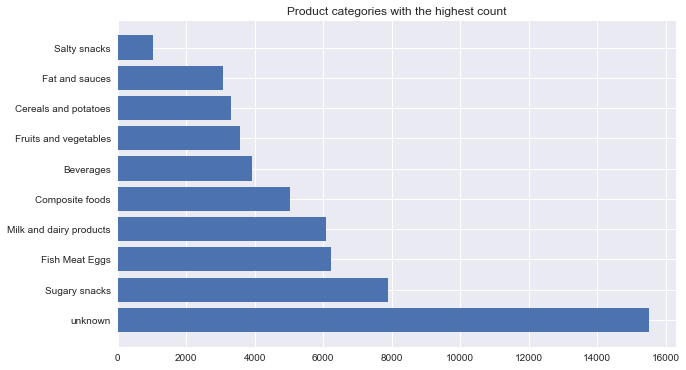

In [144]:
plot_barh_on_grouped_data(num_products_by_pnss_group1,"Pnss group 1 product with the highest count of additives","",(10,6))

# Analyse multivariée (PCA, ANOVA) <a class="anchor" id="am"></a>

In [146]:
list_pnss_group1=df["pnns_groups_1"].unique().tolist()
list_pnss_group2=df["pnns_groups_2"].unique().tolist()

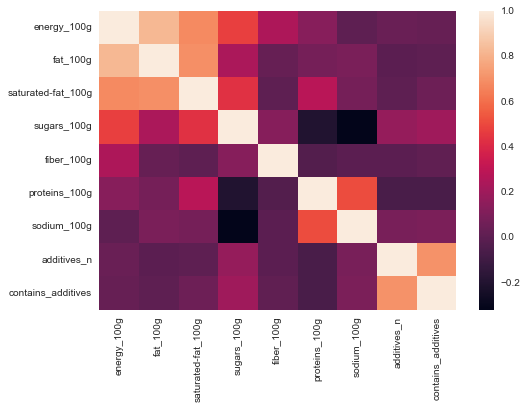

In [148]:
#look for correlated variables
sns.heatmap(df.corr());

In [149]:
X=df[numeric_features]

In [150]:
X.shape

(56533, 8)

### PCA

In [151]:


#pca = PCA(0.95)#retain95%of useful features
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca.shape

(56533, 4)

In [152]:
X_pca

array([[-1.46822950e+01,  7.84612594e-02,  6.92359976e-02,
        -2.08201540e-02],
       [-1.46822950e+01,  7.84612594e-02,  6.92359976e-02,
        -2.08201540e-02],
       [ 4.57237381e+02,  1.55113275e+00, -1.54241021e+01,
        -3.76580310e+00],
       ...,
       [-5.81718915e+02, -5.09470152e-01, -1.60371115e+00,
        -4.68601308e+00],
       [-1.46822950e+01,  7.84612594e-02,  6.92359976e-02,
        -2.08201540e-02],
       [-2.87743605e+02,  2.05228833e-01, -6.01760450e+00,
        -6.24603206e+00]])

In [153]:
pca.explained_variance_ratio_#tell how do  a column capture the useful information

array([9.99455681e-01, 3.07201986e-04, 1.30022686e-04, 7.29594540e-05])

In [154]:
pca.n_components_

4


### ANOVA


In [168]:
#ONE-WAY ANOVA USING SCIPY.STATS

    
stats.f_oneway(df[df['pnns_groups_2']==list_pnss_group2[1]]['additives_n'],
               df[df['pnns_groups_2']==list_pnss_group2[2]]['additives_n'],
               df[df['pnns_groups_2']==list_pnss_group2[3]]['additives_n'])

F_onewayResult(statistic=52.934828063867656, pvalue=2.2496217861910795e-23)

**NOTE** The pvalue <0.5.this rejects the null hypothesis of equality of means of additives_n  between at least 2 of the mentioned 3 groups of pnns_groups_2

In [159]:

rp.summary_cont(df['additives_n'])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,additives_n,56533.0,1.2321,2.2425,0.0094,1.2136,1.2506


In [160]:
rp.summary_cont(df['additives_n'].groupby(df['pnns_groups_2']))

,N,Mean,SD,SE,95% Conf.,Interval
pnns_groups_2,,,,,,
Appetizers,915,1.0656,1.7911,0.0592,0.9494,1.1818
Artificially sweetened beverages,106,5.3585,1.8058,0.1754,5.0107,5.7063
Biscuits and cakes,3808,3.3306,2.9874,0.0484,3.2357,3.4255
Bread,840,1.2619,1.8879,0.0651,1.1340,1.3898
Breakfast cereals,149,0.3423,0.8201,0.0672,0.2095,0.4751
Cereals,2080,0.0736,0.3934,0.0086,0.0566,0.0905
Cheese,2851,0.4570,1.0569,0.0198,0.4182,0.4958
Chocolate products,2017,1.2796,1.7079,0.0380,1.2050,1.3542
Dairy desserts,511,2.8278,2.6608,0.1177,2.5965,3.0590
